In [6]:
import numpy as np    
import matplotlib.pyplot as plt  
from matplotlib.animation import FuncAnimation 
from matplotlib import cm
from numpy.random import randn

delta=10**(-10);
tau=9
DPhi=0.02

rhos=np.array([0.95]);
ColMap=np.array([ [0, 1, 0], 
                 [0, 0, 1],
                 [0, 1, 1],
                  [1, 0, 0],
                  [ 1, 0, 1],
                 [1, 1, 0]                  
                  
                 ]);
phis=np.arange(0.42, 0.98+delta, 0.02)
taus=np.array([9]);
NumRep=1000;

PhisPlot=np.arange(0.38, 1+delta, DPhi)
PeriodPlot=np.zeros( (len(taus), len(PhisPlot)) )
PeriodDev=np.zeros( (len(taus), len(PhisPlot)) )
NumSam=np.zeros( (len(taus), len(PhisPlot)) )

PeriodSet=np.zeros( (len(rhos), len(phis)) )
PeriodSetDev=np.zeros( (len(rhos), len(phis)) )
RatioSetSuc=np.zeros( (len(rhos), len(phis)) )

PreFix=['Spi9','Spi9','Spi9','Spi9','Spi91']

In [10]:
for tau in taus:
    if tau==12:
        PhiData=np.loadtxt("/home/xiaoling/SpiralWave/data/Spi91_PhiAct_Tau"+str(tau)+"Rho95.dat")
        PerData=np.loadtxt("/home/xiaoling/SpiralWave/data/Spi91_Period_Tau"+str(tau)+"Rho95.dat")
        PhiData=PhiData.flatten()
        PerData=PerData.flatten()
    elif tau==9:
        PhiData=np.loadtxt("/home/xiaoling/SpiralWave/data/Spi11_PhiAct_Phi_Rho95Tau"+str(tau)+".dat")
        PerData=np.loadtxt("/home/xiaoling/SpiralWave/data/Spi11_Period_Phi_Rho95Tau"+str(tau)+".dat")
        PhiData=PhiData.flatten()
        PerData=PerData.flatten()


    for phi in PhisPlot:
        PerPhi=PerData[(phi-DPhi/2 <= PhiData)*(PhiData< phi+ DPhi/2)]
        PerPhiEff=PerPhi[PerPhi> 0]
        if len(PerPhiEff):
            PeriodPlot[taus==tau,PhisPlot==phi]=np.mean(PerPhiEff);
            PeriodDev[taus==tau,PhisPlot==phi]=np.std(PerPhiEff)/np.sqrt(len(PerPhiEff) );
            NumSam[taus==tau, PhisPlot==phi]=len(PerPhiEff);


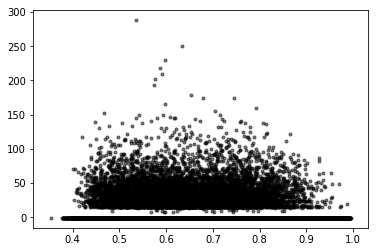

In [40]:
plt.figure()
plt.scatter(PhiData, PerData, s=area, c=colors, alpha=0.5)
plt.show()

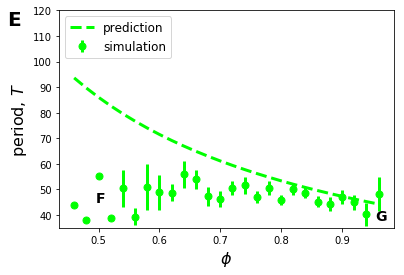

In [16]:
plt.figure()
for k in range(1):
    plt.errorbar(PhisPlot[PeriodPlot[k,:]>0], PeriodPlot[k,:][PeriodPlot[k,:]>0], PeriodDev[k,:][PeriodPlot[k,:]>0],linestyle='', linewidth=3, marker='o',
    markersize=7,color=ColMap[k,:], label=r'simulation')
    #plt.plot(phis, PeriodSet[k,:], linestyle='-.', linewidth=3, color=ColMap[2,:], marker='o',
    #  markersize=7, label=r'$\rho=$'+str(rhos[k]) )
    #line2,=plt.plot(x,x**1.5, linestyle='-', color=(1,0,0), linewidth=4, marker='^',
    # markerfacecolor='blue', markeredgecolor='r', markersize=12, label='example 2')
    if k==0:
        T_pre=2/1.8367*( 2/(1-rhos[0])/PhisPlot -1)
        plt.plot(PhisPlot[PeriodPlot[k,:]>0], T_pre[PeriodPlot[k,:]>0], linestyle='--',linewidth=3, color=ColMap[k, :], label=r'prediction' )
    
#plt.plot(np.arange(5, 40,0.5), 10+1.4*np.arange(5, 40,0.5), linestyle='--', linewidth=3, label='predicted')
plt.legend(loc="upper left", fontsize=12)     

#plt.axis([0, 12, 0, 120])
plt.ylim( (35,120))
plt.xlabel(r'$\phi$', fontsize=16)
plt.ylabel(r'period, $T$', fontsize=16)

plt.text(PhisPlot[np.isclose(PhisPlot,0.5)][0]-0.005, PeriodPlot[0, np.isclose(PhisPlot,0.5)][0]-10, 'F', fontsize=14, fontweight='bold')
plt.text(PhisPlot[np.isclose(PhisPlot,0.96)][0]-0.005, PeriodPlot[0, np.isclose(PhisPlot,0.96)][0]-10, 'G',fontsize=14,fontweight= 'bold')

plt.text(0.35, 120, "E", {'color': 'k', 'fontsize': 20, 'fontweight': 'bold'},
          horizontalalignment='left',
         verticalalignment='top',
         rotation=0,
         clip_on=False)
         #transform=plt.gca().transAxes)
#plt.title(r"$\rho=0.95$", fontsize=18)
#plt.legend([line1, line2], ['ex1','ex2'])

#plt.savefig("plot_2curves.eps", dpi=30
#blue_line = mlines.Line2D([], [], color='blue', marker='*',
                          #markersize=15, label='Blue stars')
#plt.legend(handles=[blue_line])
plt.savefig("/home/xiaoling/SpiralWave/PapFig/Lin_Per_PhiAct_Rho95_Spi11_Review.png", dpi=500)
plt.show()

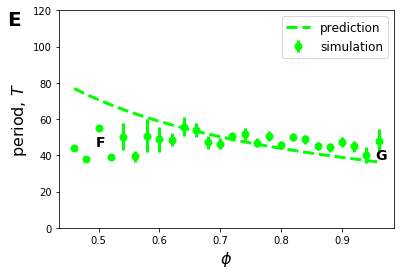

In [3]:
plt.figure()
for k in range(1):
    plt.errorbar(PhisPlot[PeriodPlot[k,:]>0], PeriodPlot[k,:][PeriodPlot[k,:]>0], PeriodDev[k,:][PeriodPlot[k,:]>0],linestyle='', linewidth=3, marker='o',
    markersize=7,color=ColMap[k,:], label=r'simulation')
    #plt.plot(phis, PeriodSet[k,:], linestyle='-.', linewidth=3, color=ColMap[2,:], marker='o',
    #  markersize=7, label=r'$\rho=$'+str(rhos[k]) )
    #line2,=plt.plot(x,x**1.5, linestyle='-', color=(1,0,0), linewidth=4, marker='^',
    # markerfacecolor='blue', markeredgecolor='r', markersize=12, label='example 2')
    if k==0:
        T_pre=2/np.sqrt(10/2)*( 2/(1-rhos[0])/PhisPlot -1)
        plt.plot(PhisPlot[PeriodPlot[k,:]>0], T_pre[PeriodPlot[k,:]>0], linestyle='--',linewidth=3, color=ColMap[k, :], label=r'prediction' )
    
#plt.plot(np.arange(5, 40,0.5), 10+1.4*np.arange(5, 40,0.5), linestyle='--', linewidth=3, label='predicted')
plt.legend(loc="upper right", fontsize=12)     

#plt.axis([0, 12, 0, 120])
plt.ylim( (0,120))
plt.xlabel(r'$\phi$', fontsize=16)
plt.ylabel(r'period, $T$', fontsize=16)

plt.text(PhisPlot[np.isclose(PhisPlot,0.5)][0]-0.005, PeriodPlot[0, np.isclose(PhisPlot,0.5)][0]-10, 'F', fontsize=14, fontweight='bold')
plt.text(PhisPlot[np.isclose(PhisPlot,0.96)][0]-0.005, PeriodPlot[0, np.isclose(PhisPlot,0.96)][0]-10, 'G',fontsize=14,fontweight= 'bold')

plt.text(0.35, 120, "E", {'color': 'k', 'fontsize': 20, 'fontweight': 'bold'},
          horizontalalignment='left',
         verticalalignment='top',
         rotation=0,
         clip_on=False)
         #transform=plt.gca().transAxes)
#plt.title(r"$\rho=0.95$", fontsize=18)
#plt.legend([line1, line2], ['ex1','ex2'])

#plt.savefig("plot_2curves.eps", dpi=30
#blue_line = mlines.Line2D([], [], color='blue', marker='*',
                          #markersize=15, label='Blue stars')
#plt.legend(handles=[blue_line])
plt.savefig("/home/xiaoling/SpiralWave/PapFig/Lin_Per_PhiAct_Rho95_Spi11_2.png", dpi=500)
plt.show()

In [14]:
PhisPlot[np.isclose(PhisPlot,0.5)]-0.005, PeriodPlot[0, np.isclose(PhisPlot,0.5)]-10

(array([ 0.495]), array([ 45.2]))

In [5]:
PeriodPlot

array([[  0.        ,   0.        ,   0.        ,   0.        ,
         44.        ,  38.        ,  55.2       ,  38.857143  ,
         50.375     ,  39.381969  ,  50.911111  ,  48.82337657,
         48.72270467,  55.8796815 ,  53.94117933,  47.26927597,
         46.35948551,  50.39765634,  51.59717208,  47.05026601,
         50.58434587,  45.81804124,  50.00642333,  48.78504964,
         45.26521511,  44.35498537,  47.1009938 ,  44.90185129,
         40.23560813,  48.12468483,   0.        ,   0.        ]])

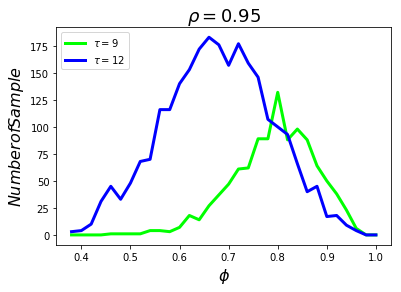

In [32]:
plt.figure()
for k in range(len(taus) ):
    plt.plot(PhisPlot, NumSam[k,:], linestyle='-', linewidth=3, color=ColMap[k,:], label=r'$\tau=$'+str(taus[k]) )
    #plt.errorbar(PhisPlot, PeriodPlot[k,:], PeriodDev[k,:], linestyle='-', linewidth=3, color=ColMap[k,:], marker='o',
    #  markersize=7, label=r'$\rho=$'+str(rhos[k]) )
    
    #plt.plot(phis, PeriodSet[k,:], linestyle='-.', linewidth=3, color=ColMap[2,:], marker='o',
    #  markersize=7, label=r'$\rho=$'+str(rhos[k]) )
   
    


    
#plt.plot(np.arange(5, 40,0.5), 10+1.4*np.arange(5, 40,0.5), linestyle='--', linewidth=3, label='predicted')
plt.legend(loc="upper left")     
#line2,=plt.plot(x,x**1.5, linestyle='-', color=(1,0,0), linewidth=4, marker='^',
#     markerfacecolor='blue', markeredgecolor='r', markersize=12, label='example 2')
#plt.axis([0, 12, 0, 120])
plt.xlabel(r'$\phi$', fontsize=16)
plt.ylabel(r'$Number of Sample$', fontsize=16)
#plt.xlim( (0.4, 1))
plt.title(r"$\rho=0.95$", fontsize=18)
#plt.legend([line1, line2], ['ex1','ex2'])

#plt.savefig("plot_2curves.eps", dpi=300)

#blue_line = mlines.Line2D([], [], color='blue', marker='*',
                          #markersize=15, label='Blue stars')
#plt.legend(handles=[blue_line])
plt.savefig("/home/xiaoling/SpiralWave/figure/Lin_NumSam_PhiAct_Rho95_Spi11.png", dpi=500)
plt.show()

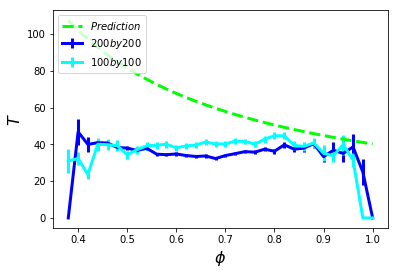

In [55]:

PeriodPlot100=np.array([ 31.0, 32.27222225, 23.6317765, 40.0426197419, 39.8313723556, 39.2623829394, 34.3095285833, 37.1251780735, 39.2402089857, 39.5350282586, 40.0685125345, 38.1254069286, 39.1684694183, 39.640138, 41.2738114645, 40.215938392, 40.2494850637, 41.7492787458, 41.5891384591, 40.1210094863, 42.7595137944, 44.71167217, 44.639054043, 39.4404840455, 38.887443225, 40.7776804889, 35.1234691176, 33.8136615, 39.8518674444, 31.57313325, 0.0, 0.0 ])
PeriodDev100=np.array([ 6.74582623041, 3.65103040114, 2.47340386704, 3.6825234666, 2.97319737636, 3.04265352494, 2.17332064327, 2.22822339413, 2.18621709262, 1.86551942437, 1.92650244085, 1.54373782113, 1.66897140145, 1.62863244694, 1.60026114454, 1.41283197969, 1.66721762238, 1.56489204932, 1.50507251569, 1.56108725296, 1.86922216361, 1.96494911241, 1.92807552183, 2.5599618743, 2.6498393481, 2.73015487187, 4.3844448574, 3.54766267159, 5.47992659476, 3.76676452564, 0.0, 0.0 ])

plt.figure()
for k in np.arange(len(rhos)):
    plt.errorbar(PhisPlot, PeriodPlot[k,:], PeriodDev[k,:], linestyle='-', linewidth=3, color=ColMap[3,:], label=r'$200 by 200$')
    plt.errorbar(PhisPlot, PeriodPlot100, PeriodDev100, linestyle='-', linewidth=3, color=ColMap[4,:], label=r'$100 by 100$')
    #plt.errorbar(PhisPlot, PeriodPlot[k,:], PeriodDev[k,:], linestyle='-', linewidth=3, color=ColMap[k,:], marker='o',
    #  markersize=7, label=r'$\rho=$'+str(rhos[k]) )
    
    #plt.plot(phis, PeriodSet[k,:], linestyle='-.', linewidth=3, color=ColMap[2,:], marker='o',
    #  markersize=7, label=r'$\rho=$'+str(rhos[k]) )
    
    T_pre=2/1.94*( 2/(1-rhos[k])/PhisPlot -1);
    plt.plot(PhisPlot, T_pre, linestyle='--',linewidth=3, color=ColMap[2, :], label=r'$Prediction$' )

    


    
#plt.plot(np.arange(5, 40,0.5), 10+1.4*np.arange(5, 40,0.5), linestyle='--', linewidth=3, label='predicted')
plt.legend(loc="upper left")     
#line2,=plt.plot(x,x**1.5, linestyle='-', color=(1,0,0), linewidth=4, marker='^',
#     markerfacecolor='blue', markeredgecolor='r', markersize=12, label='example 2')
#plt.axis([0, 12, 0, 120])
plt.xlabel(r'$\phi$', fontsize=16)
plt.ylabel(r'$T$', fontsize=16)
#plt.xlim( (0.4, 1))
#plt.title("Xiaoling's practice", fontsize=18)
#plt.legend([line1, line2], ['ex1','ex2'])

#plt.savefig("plot_2curves.eps", dpi=300)

#blue_line = mlines.Line2D([], [], color='blue', marker='*',
                          #markersize=15, label='Blue stars')
#plt.legend(handles=[blue_line])
plt.savefig("/home/xiaoling/SpiralWave/figure/Lin_Per_PhiAct_Rho95_1.png", dpi=500)
plt.show()


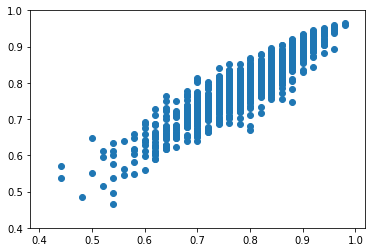

In [44]:
PAData=np.loadtxt("/home/xiaoling/SpiralWave/data/Spi11_PhiAct_Phi_Rho95Tau9.dat")
PAData.ravel()
PhiData=np.repeat(phis, 1000)
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
line=ax.scatter(PhiData, PAData)
ax.set_ylim( (0.4,1))
plt.show()